In [1]:
# 1、高斯噪声

import numpy as np
import cv2
from numpy import shape 
import random
def GaussianNoise(src,means,sigma,percetage):
    NoiseImg=src
    NoiseNum=int(percetage*src.shape[0]*src.shape[1])
    for i in range(NoiseNum):
        randX=random.randint(0,src.shape[0]-1)
        randY=random.randint(0,src.shape[1]-1)
        NoiseImg[randX,randY]=NoiseImg[randX,randY]+random.gauss(means,sigma)
        if  NoiseImg[randX, randY]< 0:
            NoiseImg[randX, randY]=0
        elif NoiseImg[randX, randY]>255:
            NoiseImg[randX, randY]=255
    return NoiseImg
img = cv2.imread('C:\\Users\\83632\\Desktop\\lenna.png',0)
img1 = GaussianNoise(img,2,4,0.8)
img = cv2.imread('C:\\Users\\83632\\Desktop\\lenna.png')
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('source',img2)
cv2.imshow('lenna_GaussianNoise',img1)
cv2.waitKey(0)



-1

In [18]:
# 2、椒盐噪声

import numpy as np
import cv2
from numpy import shape
import random
def fun1(src, percetage):     
    NoiseImg = src    
    NoiseNum = int(percetage*src.shape[0]*src.shape[1])
    for i in range(NoiseNum): 
        randX=random.randint(0,src.shape[0]-1)
        randY=random.randint(0,src.shape[1]-1)
        if random.random()<=0.5:
            NoiseImg[randX,randY]=0
        else:
            NoiseImg[randX,randY]=255
    return NoiseImg

img=cv2.imread('C:\\Users\\83632\\Desktop\\lenna.png',0)
img1=fun1(img,0.8)
img = cv2.imread('C:\\Users\\83632\\Desktop\\lenna.png')
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('source',img2)
cv2.imshow('lenna_PepperandSalt',img1)
cv2.waitKey(0)

-1

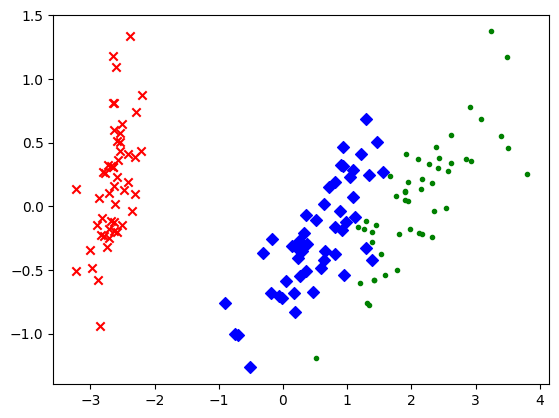

In [5]:
# 3、PCA

import matplotlib.pyplot as plt
import sklearn.decomposition as dp
from sklearn.datasets import load_iris

x,y=load_iris(return_X_y=True) 
pca=dp.PCA(n_components=2) 
reduced_x=pca.fit_transform(x) 


red_x,red_y=[],[]
blue_x,blue_y=[],[]
green_x,green_y=[],[]
for i in range(len(reduced_x)): 
    if y[i]==0:
        red_x.append(reduced_x[i][0])
        red_y.append(reduced_x[i][1])
    elif y[i]==1:
        blue_x.append(reduced_x[i][0])
        blue_y.append(reduced_x[i][1])
    else:
        green_x.append(reduced_x[i][0])
        green_y.append(reduced_x[i][1])
plt.scatter(red_x,red_y,c='r',marker='x')
plt.scatter(blue_x,blue_y,c='b',marker='D')
plt.scatter(green_x,green_y,c='g',marker='.')
plt.show()
